<div style="border:solid green 2px; padding: 20px">
<b>Иван, привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Критическая ошибка:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Хорошо, но можно и лучше:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Все отлично:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Исследование надежности заемщиков.

### Шаг 1. Обзор данных

In [102]:
import pandas as pd
df = pd.read_csv('/datasets/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Есть пропуски в столбцах days_employed и total_income 

In [103]:
df.isna().mean().sort_values(ascending=False)

days_employed       0.100999
total_income        0.100999
children            0.000000
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
purpose             0.000000
dtype: float64

### Процент пропущенных значений days_employed - 10.1%
### Процент пропущенных значений total_income - 10.1%


### Шаг 2.1 Заполнение пропусков

In [104]:
df['days_employed'].fillna(df['days_employed'].median())
df['total_income'].fillna(df['total_income'].median())
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


#### Замена количественных значений медианными так как в таком случае значения будут более преближены к реальным, средняя вызовет перекос

### Шаг 2.2 Проверка данных на аномалии и исправления.

In [105]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


### Есть отрицательные значения количества детей
### Есть не реально большое количество детей
### Есть не реально большой трудовой стаж

In [106]:
df['children'].value_counts()/len(df['children'])

 0     0.657329
 1     0.223833
 2     0.095470
 3     0.015331
 20    0.003531
-1     0.002184
 4     0.001905
 5     0.000418
Name: children, dtype: float64

In [107]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [108]:
df = df.replace({'children':{-1:1, 20:2}})
df['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

### Считаем -1 и 20 детей ошибочным вводом меняем на 1 и 2 соответственно

<AxesSubplot:>

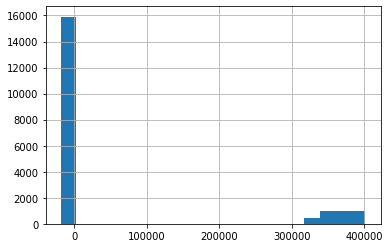

In [109]:
df['days_employed'].hist(bins=20)


#### В days_employed присутствуют аномально высокие даные по стажу


In [110]:
df = df[df['days_employed'] < 300000]

<AxesSubplot:>

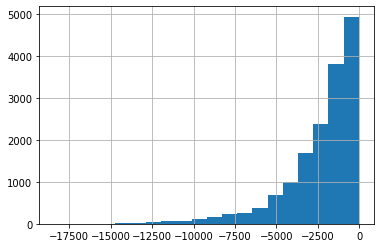

In [111]:
df['days_employed'].hist(bins=20)

#### Отрицательных значений стажа быть не может

<AxesSubplot:>

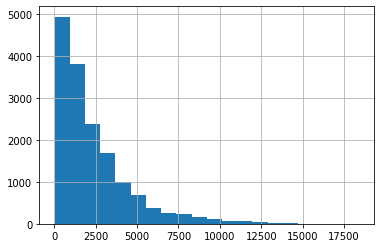

In [112]:
df['days_employed'] = df['days_employed'].abs()
df['days_employed'].hist(bins=20)

### Со стажем теперь порядок

<AxesSubplot:>

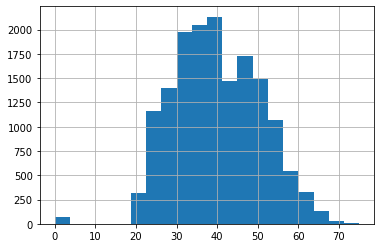

In [113]:
df['dob_years'].hist(bins=20)

### Менее 10 лет заемщику быть не может


<AxesSubplot:>

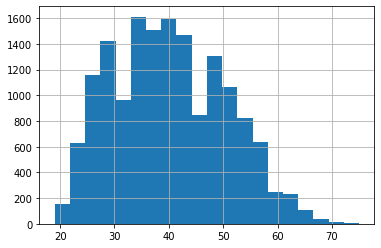

In [114]:
df = df[df['dob_years'] > 10]
df['dob_years'].hist(bins=20)

### С возрастом заемщика порядок

In [115]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи
10,2,4171.483647,36,высшее,0,женат / замужем,0,M,компаньон,0,113943.491460,покупка недвижимости


### Шаг 2.3. Изменение типов данных.

In [116]:
df['total_income'] = df['total_income'].astype('int')

### Шаг 2.4. Удаление дубликатов.

In [117]:
df.duplicated().sum()

0

### Явных дубликатов нет

In [118]:
df['education'].unique() 

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'], dtype=object)

### Присутствуют неявные дубликаты из за разности регистра


In [119]:
df['education'] = df['education'].str.lower()
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи
10,2,4171.483647,36,высшее,0,женат / замужем,0,M,компаньон,0,113943,покупка недвижимости


In [120]:
df['family_status'].unique() 

array(['женат / замужем', 'гражданский брак', 'в разводе',
       'Не женат / не замужем', 'вдовец / вдова'], dtype=object)

In [121]:
df['income_type'].unique() 

array(['сотрудник', 'компаньон', 'госслужащий', 'студент',
       'предприниматель', 'в декрете'], dtype=object)

#### В должностях и семейном положении дубликатов нет

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

In [122]:
df_education = df[['education','education_id']].drop_duplicates().reset_index(drop=True)
df_education

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


In [123]:
df_family_status = df[['family_status','family_status_id']].drop_duplicates().reset_index(drop=True)
df_family_status

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,в разводе,3
3,Не женат / не замужем,4
4,вдовец / вдова,2


In [124]:
df = df.drop(['family_status','education'],axis=1)

In [125]:
df

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование
5,0,926.185831,27,0,1,M,компаньон,0,255763,покупка жилья
...,...,...,...,...,...,...,...,...,...,...
21519,1,2351.431934,37,4,3,M,сотрудник,0,115949,покупка коммерческой недвижимости
21520,1,4529.316663,43,1,1,F,компаньон,0,224791,операции с жильем
21522,1,2113.346888,38,1,1,M,сотрудник,1,89672,недвижимость
21523,3,3112.481705,38,1,0,M,сотрудник,1,244093,на покупку своего автомобиля


### Шаг 2.6. Категоризация дохода.

In [126]:
df['total_income_category'] = pd.cut(df['total_income'],[0,30000,50000,200000,1000000,float('inf')],labels=['E','D','C','B','A']) 

In [127]:
df

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
5,0,926.185831,27,0,1,M,компаньон,0,255763,покупка жилья,B
...,...,...,...,...,...,...,...,...,...,...,...
21519,1,2351.431934,37,4,3,M,сотрудник,0,115949,покупка коммерческой недвижимости,C
21520,1,4529.316663,43,1,1,F,компаньон,0,224791,операции с жильем,B
21522,1,2113.346888,38,1,1,M,сотрудник,1,89672,недвижимость,C
21523,3,3112.481705,38,1,0,M,сотрудник,1,244093,на покупку своего автомобиля,B


### Шаг 2.7. Категоризация целей кредита.

In [128]:
def purpose_category(purpose):
  if 'автомоб' in purpose:
    return 'операции с автомобилем'
  if 'жил' in purpose or 'недвижим' in purpose:
    return 'операции с недвижимостью'
  if 'свадьб' in purpose:
    return 'проведение свадьбы'
  if 'образов' in purpose:
    return 'получение образования'
df['purpose_category'] = df['purpose'].apply(purpose_category)

In [129]:
df

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
5,0,926.185831,27,0,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
...,...,...,...,...,...,...,...,...,...,...,...,...
21519,1,2351.431934,37,4,3,M,сотрудник,0,115949,покупка коммерческой недвижимости,C,операции с недвижимостью
21520,1,4529.316663,43,1,1,F,компаньон,0,224791,операции с жильем,B,операции с недвижимостью
21522,1,2113.346888,38,1,1,M,сотрудник,1,89672,недвижимость,C,операции с недвижимостью
21523,3,3112.481705,38,1,0,M,сотрудник,1,244093,на покупку своего автомобиля,B,операции с автомобилем


### Ответы на вопросы.

##### Вопрос 1: Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [130]:
df.groupby('children')['debt'].mean()

children
0    0.082107
1    0.095817
2    0.097340
3    0.073171
4    0.090909
5    0.000000
Name: debt, dtype: float64

###### Процент не возврата кредита в срок в семье без детей - 8,2%
###### Процент не возврата кредита в срок в семье где один ребенок - 9,6% 
###### Процент не возврата кредита в срок в семье где две детей - 9,7%
###### Процент не возврата кредита в срок в семье где трое детей - 7,3%
###### Процент не возврата кредита в срок в семье где четверо детей - 9,1%
###### Процент не возврата кредита в срок в семье где пятеро детей - 0%

#### Вывод 1: Исходя из полученных данный семьи где двое, трое и четверо детей чаще других имеют задолженности по кредиту

##### Вопрос 2: Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [131]:
df2 = pd.pivot_table(df,
               index=['family_status_id'],
               values=['debt'],
               aggfunc=['mean','count'])
pd.concat([df2, df_family_status],axis=1)

,"(mean, debt)","(count, debt)",family_status,family_status_id
0,0.080581,9233,женат / замужем,0
1,0.098089,3140,гражданский брак,1
2,0.062992,381,в разводе,3
3,0.074116,877,Не женат / не замужем,4
4,0.109496,2201,вдовец / вдова,2


#### Вывод 2: Клиенты находящиеся в разводе либо не женаты/ не замужем реже имеют задолженности по кредитам.

##### Вопрос 3: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [132]:
pd.pivot_table(df,
               index=['total_income_category'],
               values=['debt'],
               aggfunc='mean')

,debt
total_income_category,
E,0.000000
D,0.076087
C,0.093461
B,0.072532
A,0.080000


#### Вывод 3: Люди со средним доходом чаще других имеют задолжности по кредитам

##### Вопрос 4: Как разные цели кредита влияют на его возврат в срок?

In [133]:
pd.pivot_table(df,
               index=['purpose_category'],
               values=['debt'],
               aggfunc='mean')

,debt
purpose_category,
операции с автомобилем,0.101802
операции с недвижимостью,0.079003
получение образования,0.098601
проведение свадьбы,0.079977


###### Процент не возврата кредита в срок если цель кредита операции с автомобилем - 10,2%
###### Процент не возврата кредита в срок если цель кредита операции с недвижимостью	 - 7,9% 
###### Процент не возврата кредита в срок если цель кредита получение образования	 - 9,8%
###### Процент не возврата кредита в срок если цель кредита проведение свадьбы - 7,9%

#### Вывод 4: Люди берущие кредит на образование или операции с автомобилем чаще имеют задолженность по кредиту чем те кто берут кредит на свадьбу или операции с недвижимостью.

## Общий вывод:

#### Семейное положение, количество детей, уровень дохода и цель кредита влияет на то сможет ли заемщик вернуть кредит в срок